<a href="https://colab.research.google.com/github/ProfessorDong/Deep-Learning-Course-Examples/blob/master/ML_Examples/Load_MNIST_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PyTorch Datasets:

https://pytorch.org/vision/stable/datasets.html#

In [1]:
import torch
print(torch.__version__)

import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

2.0.0+cpu


Torchvision is a package in the PyTorch library containing computer-vision models, datasets, and image transformations. 

Import the torchvision datasets and get the MNIST dataset from the torchvision package.

In [2]:
import torchvision
import torchvision.datasets as datasets

Initialize the MNIST training data set:

We use the root parameter to define where to save the data.

The train parameter is set to true because we are initializing the MNIST training dataset.

The download parameter is set to true because we want to download it if it’s not already present in our data folder.

The transform parameter is set to none because we don’t want to apply any image manipulation transforms at this time.

In [3]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

100%|██████████| 9912422/9912422 [00:00<00:00, 47655122.93it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 14444990.92it/s]

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 32329939.77it/s]

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



Initialize the MNIST test set:

It should be very quick because the data has already been loaded.

The train parameter is set to false because we want test set, not the train set.

Then like the training set, we set download to true and transform to none.

In [4]:
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

In [5]:
print(len(mnist_trainset))
print(len(mnist_testset))
print(mnist_trainset)
print(mnist_trainset.data)
print(mnist_trainset.targets)
print(mnist_trainset.classes)

60000
10000
Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,

Text(0.5, 0.98, 'Few images of MNIST testing dataset')

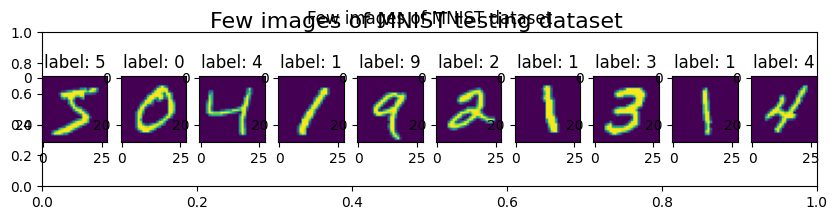

In [6]:
import matplotlib.pyplot as plt

# display a few digits from MNIST testing dataset

nb_digits_to_display = 10

plt.figure(figsize=(10,2)) 
plt.title("Few images of MNIST dataset")
for i in range(nb_digits_to_display):
    plt.subplot(1,nb_digits_to_display, i+1)
    plt.imshow(mnist_trainset.data[i].numpy())
    plt.title(f"label: {mnist_trainset.targets[i].numpy()}")

plt.suptitle("Few images of MNIST testing dataset", fontsize=16)